In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
time = np.linspace(0, 1, 512)
def sinwave(amp, freq, time, phase=0):
  return amp * np.sin(freq*time + phase)

def coswave(amp, freq, time, phase=0):
  return amp * np.cos(freq*time + phase)

def Wavg(input):
  return input.sum()/input.size

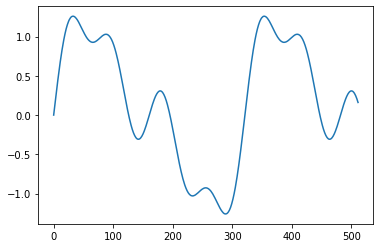

(512,) float16


In [56]:
w31 = sinwave(1, 10, time)
w32 = sinwave(0.5, 20, time)
w33 = sinwave(1/3, 40, time)
sample = w31+w32+w33
sample = sample.astype(np.float16)
plt.plot(sample)
plt.show()
print(sample.shape, sample.dtype)

In [57]:
filename = "bin/input.bin"
with open(filename, 'wb') as f:
    sample.astype(np.float32).tofile(f)

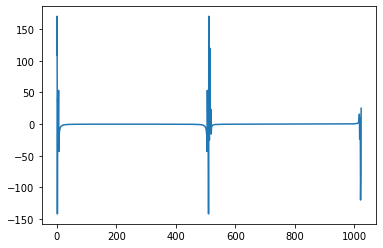

In [58]:
with open("bin/export/output.bin", "rb") as f:
    rectype = np.dtype(np.float32)
    res = np.fromfile(f, dtype=rectype)
plt.plot(res)

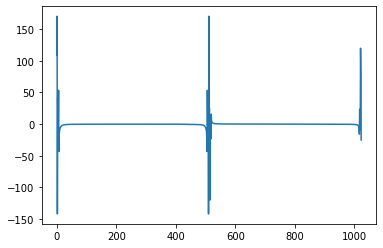

In [59]:
nft = np.fft.fft(sample)
plt.plot(np.append(nft.real, nft.imag))

(1024,) float16


(0.0, 3.0)

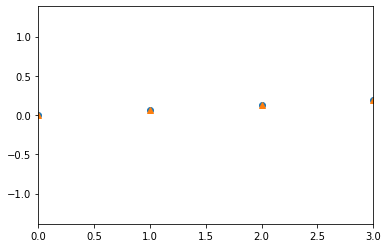

In [60]:
with open("bin/export/recover.bin", "rb") as f:
    rectype = np.dtype(np.float32)
    rec = np.fromfile(f, dtype=rectype)
rec = rec.astype(np.float16)
print(rec.shape, rec.dtype)
plt.plot(rec, 'o')
plt.plot(sample, '^')
plt.xlim(0,3)


float16 float16


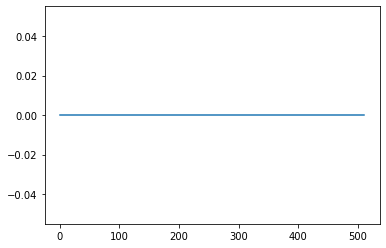

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [61]:
print(rec.dtype, sample.dtype)
error =rec[:512] - sample
plt.plot(error)
plt.show()
print(error)
